## Введение 

Цель проекта помочь маркетологам оптемизировать затраты на рекламу. На входе у нас имеется 3 таблицы, которые содержат инофрмацию о посещении сайта, заказах и затратах на маркетинг. Исслдеование будет проводиться в следующем порядке:
- Знакомство с данными;
- Предобработка(по не обходимости);
- Постороение отчетов и расчет метрик;
- Подведение итогов.


## Знакомство с данными

Импортируем pandas для работы с файлами и прочитаем таблицы.

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
visits = pd.read_csv('visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()
print('Дубликатов',visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
Дубликатов 0


In [5]:
orders = pd.read_csv('orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.info()
print('Дубликатов',orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
Дубликатов 0


In [7]:
costs = pd.read_csv('costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
costs.info()
print('Дубликатов',costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
Дубликатов 0


Вывод: данные имеют необходимы для анализа тип за исключением столбцов содержащих даты, их необходимо привести к нужному типу.

## Предобработка данных

Приведем таблицы Start Ts и End Ts к типу datetime и изменим буквы в названиях столбцов, с верхнего регистра на нижний. Так будет удобнее работать

In [9]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [10]:
visits['start ts'] = pd.to_datetime(visits['start ts'])
visits['end ts'] = pd.to_datetime(visits['end ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Вывод: данные готовы для построения отчетов, можно продолжать.

## Построение отчетов и расчет метрик

### Продукт

Необходимо добавить информацию о днях в таблицу c посещениями для того что бы посчитать какое количество пользователей пользуются сервисом:

In [11]:
visits['ts_month'] = visits['start ts'].dt.month
visits['ts_week'] = visits['start ts'].dt.week
visits['ts_date'] = visits['start ts'].dt.date
visits['ts_year'] = visits['start ts'].dt.year

Расчитаем количество пользователей в день, неделю и месяц:

In [12]:
DAU = visits.groupby('ts_date').agg({'uid':'nunique'}).mean()
DAU

uid    907.991758
dtype: float64

In [13]:
WAU = visits.groupby(['ts_year','ts_week']).agg({'uid':'nunique'}).mean()
WAU

uid    5716.245283
dtype: float64

In [14]:
MAU = visits.groupby(['ts_year','ts_month']).agg({'uid':'nunique'}).mean()
MAU

uid    23228.416667
dtype: float64

Посмотрим какое количество сессий в день:

In [15]:
count_session = visits.groupby(['ts_year', 'ts_date']).agg({'start ts':'count'}).mean()
count_session

start ts    987.362637
dtype: float64

Определим длину одной сессии:

0    60
dtype: int64

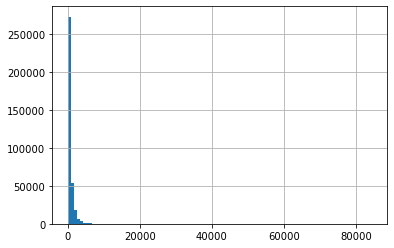

In [16]:
visits['duration_sec']= visits['end ts'] - visits['start ts']
visits['duration_sec'] = visits['duration_sec'].dt.seconds
visits['duration_sec'].hist(bins=100)
visits['duration_sec'].mode()

Теперь посмотрим как часто люди возвращаются:

In [17]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   device        359400 non-null  object        
 1   end ts        359400 non-null  datetime64[ns]
 2   source id     359400 non-null  int64         
 3   start ts      359400 non-null  datetime64[ns]
 4   uid           359400 non-null  uint64        
 5   ts_month      359400 non-null  int64         
 6   ts_week       359400 non-null  int64         
 7   ts_date       359400 non-null  object        
 8   ts_year       359400 non-null  int64         
 9   duration_sec  359400 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(2), uint64(1)
memory usage: 27.4+ MB


In [18]:
first_month = visits.groupby(['uid'])['start ts'].min()
first_month.name='first_month_visits'
visits = visits.merge(first_month, on='uid')

In [19]:
visits['first_month_visits'] = visits['first_month_visits'].astype('datetime64[M]')
visits['visit_month'] = visits['ts_date'].astype('datetime64[M]')

In [20]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_month_visits']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [21]:
cohorts = visits.groupby(['first_month_visits', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [22]:
initial_uid_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month_visits','uid']]

In [23]:
initial_uid_count = initial_uid_count.rename(columns={'uid':'cohort_users'})

In [24]:
cohorts = cohorts.merge(initial_uid_count, on='first_month_visits')

In [25]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [26]:
retention_pivot = cohorts.pivot_table(
    index='first_month_visits',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')

In [27]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month_visits,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


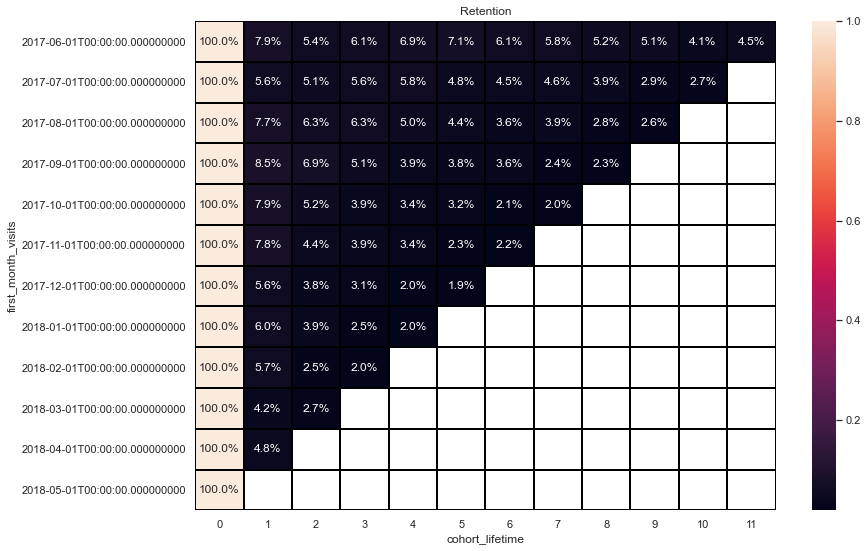

In [28]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Retention')
sns.heatmap(
    retention_pivot, 
    annot=True, fmt='.1%', 
    linewidths=1, 
    linecolor='black');

### Вывод

- DAU:907
- WAU:5716
- MAU:23228
- Количество сессий в день: 987
- Длина одной сессии: 60 сек
По графику видно время от времени люди возвращаются, но не так часто как хотелось бы. возможно нужно разобраться с источником траффика.

### Продажи

 Далее посмотрим когда пользователи начинают покупать:

In [29]:
orders['buy ts'] = pd.to_datetime(orders['buy ts'])

In [30]:
first_date_orders = orders.pivot_table(
    index='uid',
    values='buy ts',
    aggfunc = 'min').reset_index()
first_date_orders.columns=['uid','first_date_orders']

In [31]:
first_date_visits = visits.pivot_table(
    index='uid',
    values = 'start ts',
    aggfunc = 'min').reset_index()
first_date_visits.columns=['uid', 'first_date_visits']

In [32]:
orders_visits=first_date_orders.merge(first_date_visits, on='uid', how='left')

In [33]:
orders_visits['first_date_orders'] = orders_visits['first_date_orders'].astype('datetime64[M]')

In [34]:
orders_visits['first_date_visits'] = orders_visits['first_date_visits'].astype('datetime64[M]')

In [35]:
orders_visits['day_orders'] = orders_visits['first_date_orders'] - orders_visits['first_date_visits'] 

In [36]:
day_orders = orders_visits.pivot_table(
    index='day_orders',
    values = 'uid',
    aggfunc='count')
day_orders.columns=['count_uid']
day_orders['%'] = (day_orders['count_uid'] /day_orders['count_uid'].sum()) * 100

In [37]:
day_orders.sort_values(by='%', ascending=False)

,count_uid,%
day_orders,,
0 days,30087,82.378227
31 days,1141,3.124059
30 days,957,2.620267
61 days,691,1.891958
92 days,496,1.358048
153 days,283,0.774854
122 days,243,0.665334
151 days,230,0.629740
62 days,214,0.585932


После первого месяца количество покупателей снижается, большая разница количества покупателей в первом и последующих месяцах связна с возможно провдением акций на первый заказ со скидкой, поэтому не каждый пользователь готов совершать повторную покупку за наибольшую стоимость. Далее посмотрим сколько раз покупают за период:

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [39]:
orders['date_buy'] = orders['buy ts'].dt.date
orders['week_buy'] = orders['buy ts'].dt.week
orders['month_buy'] = orders['buy ts'].dt.month

In [40]:
day_buy = orders.pivot_table(
    index ='date_buy',
    values ='uid',
    aggfunc ='count').reset_index()
day_buy['uid'].mean()

138.50274725274724

In [41]:
buy_week = orders.pivot_table(
    index ='week_buy',
    values = 'uid',
    aggfunc = 'count').reset_index()
buy_week['uid'].mean()

969.5192307692307

In [42]:
buy_month = orders.pivot_table(
    index = 'month_buy',
    values = 'uid',
    aggfunc = 'count').reset_index()
buy_month['uid'].mean()

4201.25

В среднем за день покупают 138 раз, за неделю 969, за месяц 4201 раз. Рассчитаем средний чек:

In [43]:
first_order_date = orders.groupby('uid')['buy ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

In [44]:
orders_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})

In [45]:
orders_cohorts['revenue_per_user'] = orders_cohorts['revenue'] / orders_cohorts['uid']
orders_cohorts = orders_cohorts.reset_index()

In [46]:
orders_cohorts['cohort_lifetime'] = orders_cohorts['order_month'] - orders_cohorts['first_order_month']

In [47]:
orders_cohorts['cohort_lifetime'] = orders_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_cohorts['cohort_lifetime'] = orders_cohorts['cohort_lifetime'].round().astype('int')

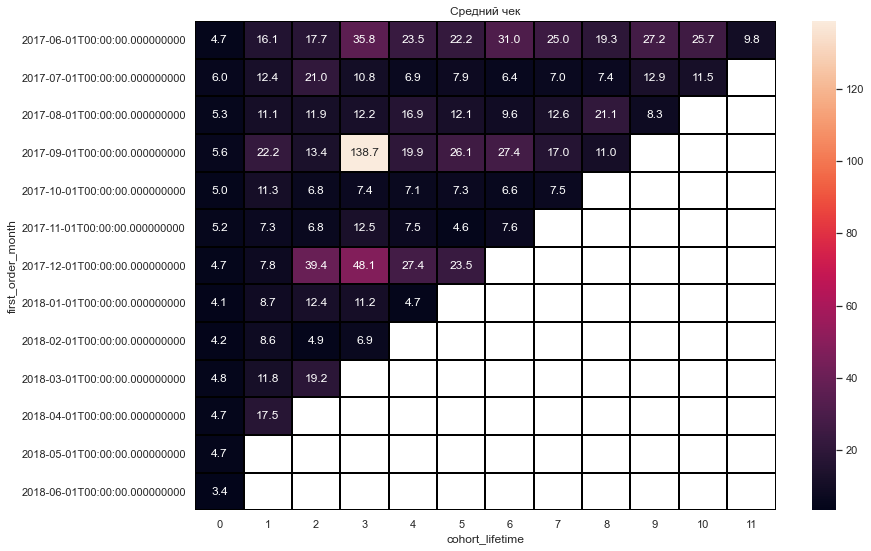

In [48]:
orders_pivot = orders_cohorts.pivot_table(
    index = 'first_order_month',
    columns = 'cohort_lifetime',
    values = 'revenue_per_user',
    aggfunc = 'mean') 
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Средний чек')
sns.heatmap(
    orders_pivot, 
    annot=True, fmt='.1f', 
    linewidths=1, 
    linecolor='black')

Посчитаем LTV:

In [49]:
first_buy = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_buy.columns = ['uid', 'first_order_month']

In [50]:
cohort_size = first_buy.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns = ['first_order_month', 'n_buyers']

In [51]:
cohort_revenue = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()

In [52]:
cohort_revenue = pd.merge(cohort_revenue, cohort_size, on='first_order_month')

In [53]:
cohort_revenue['age'] = (cohort_revenue['order_month'] - cohort_revenue['first_order_month']) / np.timedelta64(1,'M')
cohort_revenue['age'] = cohort_revenue['age'].round().astype('int')

In [54]:
margin_rate = 1
cohort_revenue['gp'] = cohort_revenue['revenue'] * margin_rate

In [55]:
cohort_revenue['ltv'] = cohort_revenue['gp']/ cohort_revenue['n_buyers']

In [56]:
ltv_output = cohort_revenue.pivot_table(
    index='first_order_month',
    columns = 'age',
    values='ltv',
    aggfunc='mean')
ltv_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


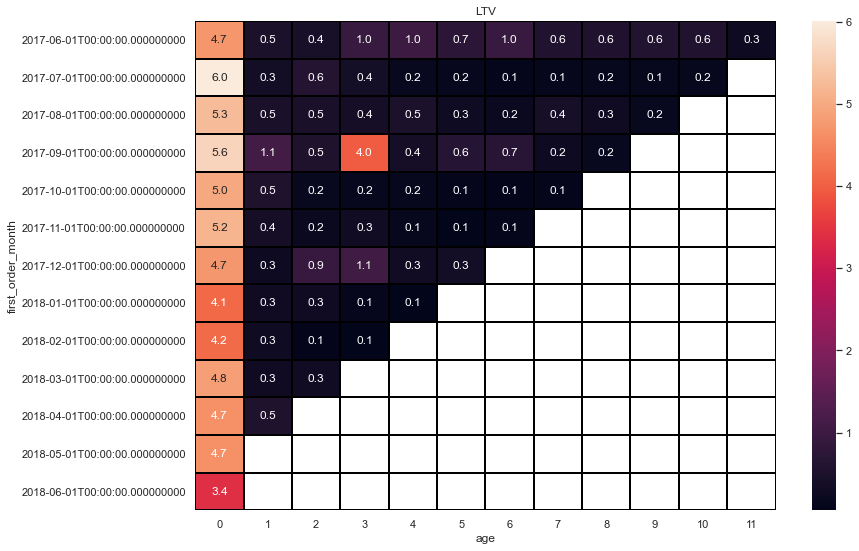

In [57]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('LTV')
sns.heatmap(
    ltv_output, 
    annot=True, fmt='.1f', 
    linewidths=1, 
    linecolor='black');

In [58]:
ltv_1 = ltv_output.loc['2017-06-01'].sum()
ltv_1

11.879233811171522

Примерно столько 11.8 денег в среднем принес каждый покупатель первой когорты

## Вывод:

- После первого месяца количество покупателей снижается, большая разница количества покупателей в первом и последующих месяцах связна с возможно провдением акций на первый заказ со скидкой, поэтому не каждый пользователь готов совершать повторную покупку за наибольшую стоимость.
- Примерно столько 11.8 денег в среднем принес каждый покупатель первой когорты
- В среднем за день покупают 138 раз, за неделю 969, за месяц 4201 раз

<div style="border:solid orange 2px; padding: 20px"> <h7 style="color:black; margin-bottom:20px"><font color='orange'> Почти всё хорошо, LTV обычно считают накопительно

## Маркетинг

In [59]:
costs['dt'] = pd.to_datetime(costs['dt'])

Посмотрим сколько денег потратили всего, на каждый источник и по времени

In [60]:
total_costs = costs['costs'].sum()
total_costs

329131.62

Потратили всего на рекламу 329131.62. Расчитаем по источникам:

In [61]:
source_costs = (costs
    .pivot_table(
    index = 'source_id',
    values = 'costs',
    aggfunc = 'sum')
    .reset_index()
    .sort_values(by='costs', ascending=False))
source_costs['%'] = (source_costs['costs'] / source_costs['costs'].sum()) * 100

In [62]:
source_costs

,source_id,costs,%
2,3,141321.63,42.937725
3,4,61073.60,18.555981
4,5,51757.10,15.725350
1,2,42806.04,13.005751
0,1,20833.27,6.329769
6,10,5822.49,1.769046
5,9,5517.49,1.676378


больше всего было потрачено на 3 источник 42%, на 4 источник 18% и на 5 исчтоник 15%. Теперь посмотрим расходы по времени:

In [63]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [64]:
time_costs = costs.pivot_table(
    index='month',
    values='costs',
    aggfunc='sum')
time_costs.reset_index()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


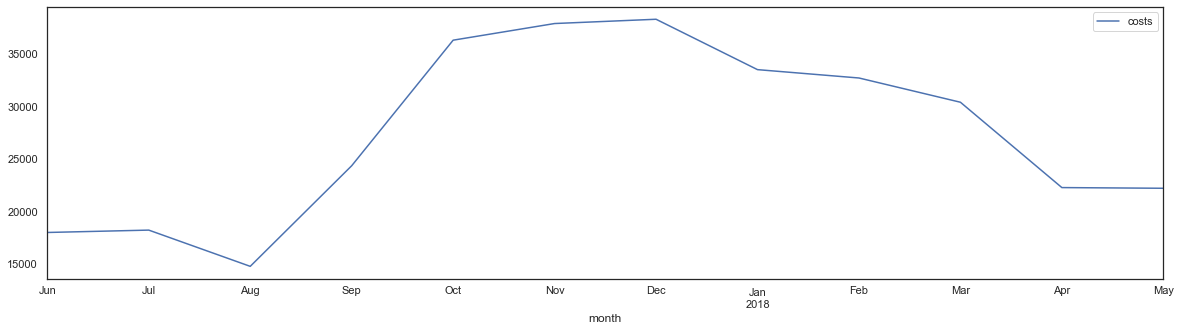

In [65]:
time_costs.plot(figsize=(20,5))

Меньше всего потратили на рекламу в августе, а больше всего в декабре. Осень - весна периоды когда денег на рекламу вкладывали больше всего. Далее расчитаем стоимость привлечения пользователя из каждого отдельного источника:

In [66]:
count_uid_on_source = visits.groupby('source id')['uid'].nunique()
count_uid_on_source.name=('count')
cac = pd.merge(source_costs, count_uid_on_source, right_on='source id', left_on='source_id')

In [67]:
cac['cac'] = cac['costs'] / cac['count']

In [68]:
print('Стоимость привлечения одного клиента на каждый источник:')
print(cac[['source_id','cac']].sort_values(by='cac', ascending=False))

Стоимость привлечения одного клиента на каждый источник:
   source_id       cac
0          3  1.890439
3          2  1.631017
4          1  1.096546
2          5  0.908434
1          4  0.731201
5         10  0.721766
6          9  0.595584


In [69]:
ROI_Full = ((orders['revenue'].sum() - costs['costs'].sum()) / costs['costs'].sum()) * 100

In [70]:
visits['month'] = visits['ts_date'].astype('datetime64[M]')

In [71]:
orders['month'] = orders['date_buy'].astype('datetime64[M]')

In [72]:
visits_group = visits.groupby(['uid', 'month']).agg({'source id':'first','device':'first'}).reset_index()

In [73]:
orders_merge = pd.merge(orders, visits_group, right_on=['uid','month'], left_on=['uid','month'], how='left')

In [74]:
orders_day = orders_merge.pivot_table(
    index =['month','source id'],
    values='revenue',
    aggfunc='sum').reset_index()

In [75]:
costs = costs.rename(columns={'source_id':'source id'})

In [76]:
costs_day = costs.pivot_table(
    index=['month', 'source id'],
    values='costs',
    aggfunc='sum').reset_index()

In [77]:
roi = pd.merge(orders_day, costs_day, right_on=['month', 'source id'], left_on=['month', 'source id'])

In [78]:
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs'] 

In [79]:
roi_pivot = roi.pivot_table(
    index='month',
    columns='source id',
    values = 'roi',
    aggfunc='mean')

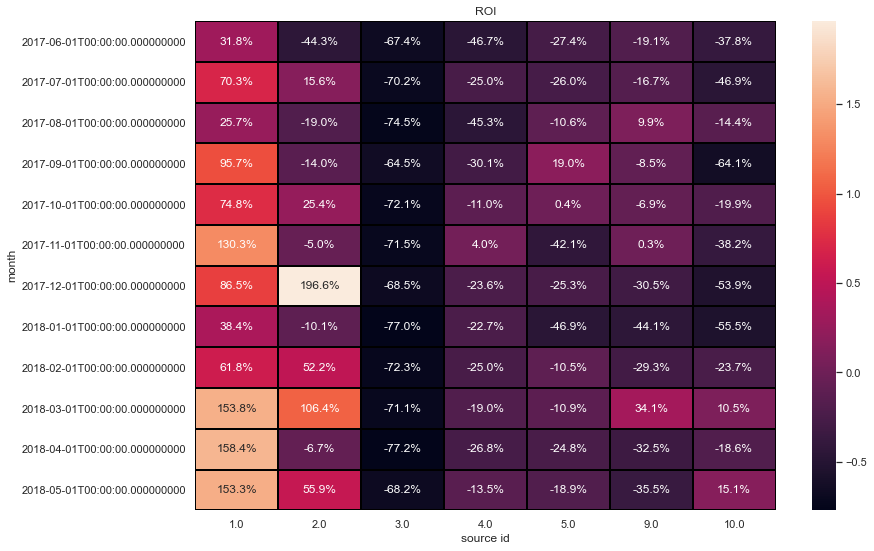

In [80]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('ROI')
sns.heatmap(
    roi_pivot, 
    annot=True, fmt='.1%', 
    linewidths=1, 
    linecolor='black')

### Вывод:
1 источник стабильно приносящий доход, все остальные источники окупаются очень редко, 3 самый убыточный. Расчитаем среднй чек по источникам:

In [81]:
sku_source = orders_merge.groupby(['month', 'source id']).agg({'revenue':'sum', 'uid':'count'}).reset_index()
sku_source['sku'] = sku_source['revenue'] / sku_source['uid']
sku_source_pivot = sku_source.pivot_table(
    index='month',
    columns='source id',
    values='sku',
    aggfunc='mean')

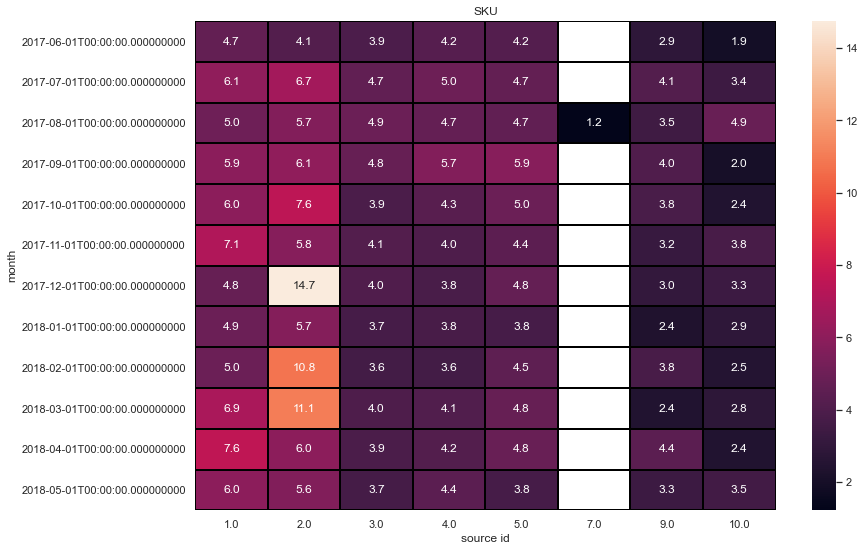

In [82]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('SKU')
sns.heatmap(
    sku_source_pivot, 
    annot=True, fmt='.1f', 
    linewidths=1, 
    linecolor='black')

### Вывод:
Средний чек первого источника показывает стабильную динамику. Теперь посмотрим средний чек по устройствам:

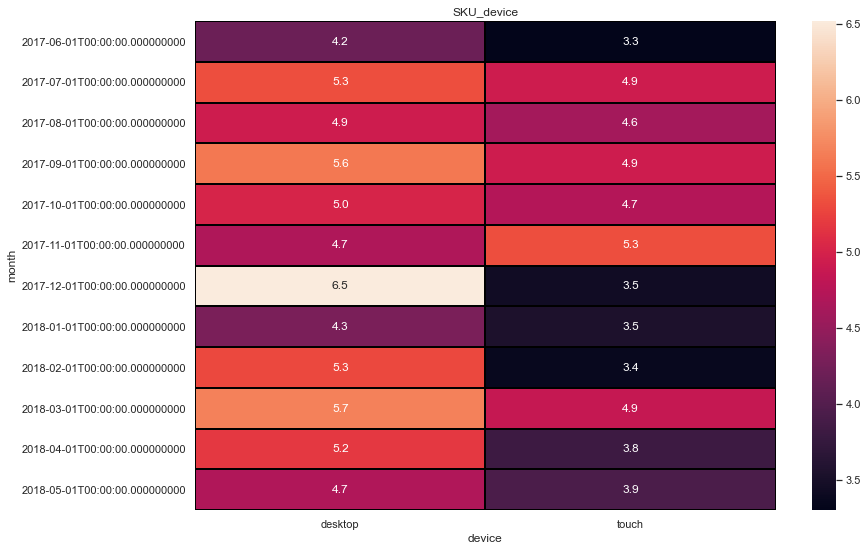

In [83]:
sku_device = orders_merge.groupby(['month','device']).agg({'revenue':'sum', 'uid':'count'}).reset_index()
sku_device['sku_device'] = sku_device['revenue'] / sku_device['uid']
sku_device_pivot = sku_device.pivot_table(
    index='month',
    columns='device',
    values='sku_device',
    aggfunc='mean')
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('SKU_device')
sns.heatmap(
    sku_device_pivot, 
    annot=True, fmt='.1f', 
    linewidths=1, 
    linecolor='black')

### Вывод: 
Самый высокий средний чек был в декабре  с утройства desktop.

In [84]:
first_activity_device = visits.groupby(['device', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
activity_device = (visits
                   .groupby(['device', 'cohort_lifetime'])
                   .agg({'uid':'count'})
                   .reset_index()
                   .rename(columns={'uid':'count'}))
cohort_device = pd.merge(first_activity_device, activity_device, right_on=['device','cohort_lifetime'], left_on=['device','cohort_lifetime'])

In [85]:
cohort_device['retention_device'] = cohort_device['uid']/cohort_device['count']

In [86]:
cohort_device_pivot = cohort_device.pivot_table(
    index='device',
    columns='cohort_lifetime',
    values='retention_device',
    aggfunc='sum')

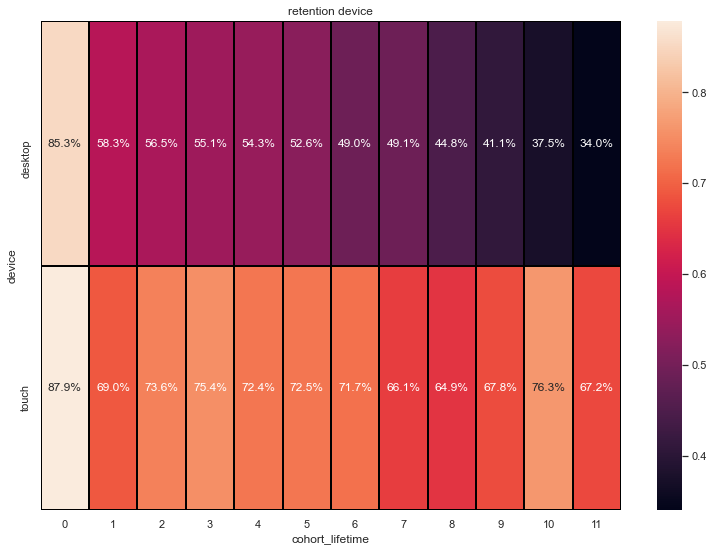

In [87]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('retention device')
sns.heatmap(
    cohort_device_pivot, 
    annot=True, fmt='.1%', 
    linewidths=1, 
    linecolor='black')

### Вывод:
пользователи touch стабильнее возвращаются на сайт, а вот пользователи desktop постпенно уходят.
Возможно это связано с тем что touch всегда с собой. Теперь посмотрим на retention по источникам:

In [88]:
first_activity_source = visits.groupby(['source id', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
activity_source = (visits
                   .groupby(['source id', 'cohort_lifetime'])
                   .agg({'uid':'count'})
                   .reset_index()
                   .rename(columns={'uid':'count'}))
cohort_source = pd.merge(first_activity_source, activity_source, right_on=['source id','cohort_lifetime'],
                         left_on=['source id','cohort_lifetime'])

In [89]:
cohort_source['retention_source'] = cohort_source['uid']/cohort_source['count']

In [90]:
cohort_source_pivot = cohort_source.pivot_table(
    index='source id',
    columns='cohort_lifetime',
    values='retention_source',
    aggfunc='sum')

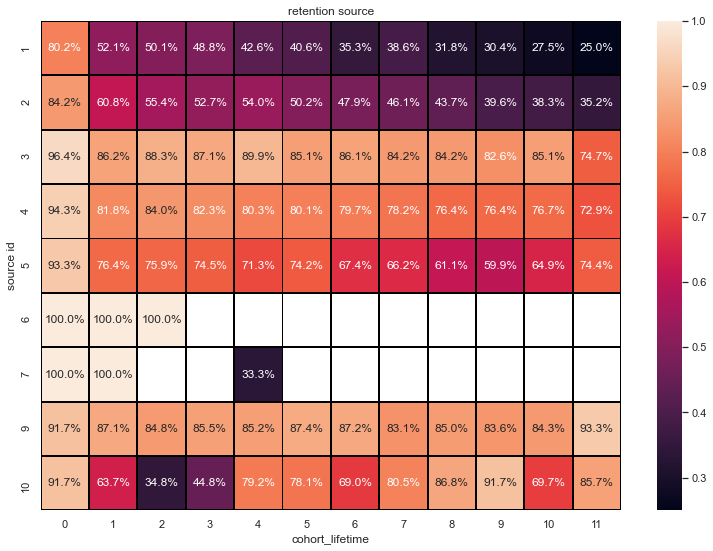

In [91]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('retention source')
sns.heatmap(
    cohort_source_pivot, 
    annot=True, fmt='.1%', 
    linewidths=1, 
    linecolor='black')

### Вывод:
Половина истоников показывает не плохой retention, 1 и 2 постепено теряют тот эффект, который был в начале. С источниками 6 и 7 какая то беда. Посмотрим на LTV по источникам и устрйствам:

In [92]:
orders_merge['lifetime'] = (orders_merge['order_month'] - orders_merge['first_order_month']) / np.timedelta64(1, 'M')
orders_merge['lifetime'] = orders_merge['lifetime'].round().astype('int')

In [93]:
orders_cohort_device = orders_merge.groupby(['lifetime', 'device']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
orders_cohort_device['ltv'] = orders_cohort_device['revenue'] / orders_cohort_device['uid']

In [94]:
cohort_device_pivot = orders_cohort_device.pivot_table(
    index='device',
    columns='lifetime',
    values='ltv',
    aggfunc='mean')

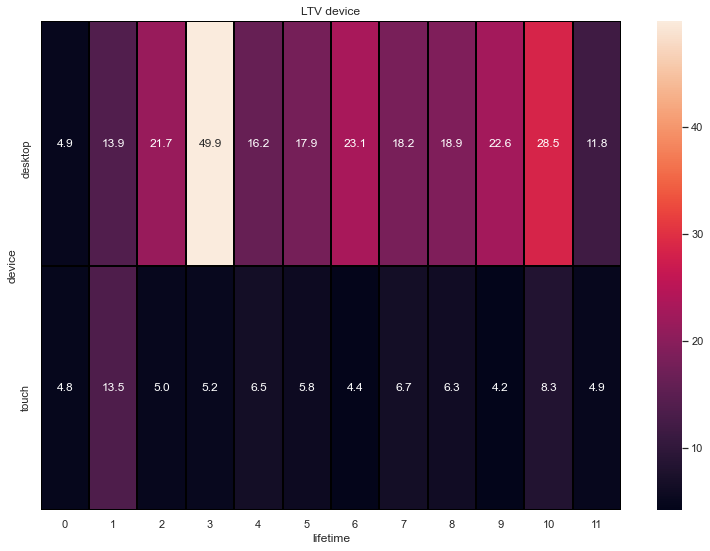

In [95]:
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('LTV device')
sns.heatmap(
    cohort_device_pivot, 
    annot=True, fmt='.1f', 
    linewidths=1, 
    linecolor='black')

In [96]:
ltv_desktop = cohort_device_pivot.loc['desktop'].sum().round()
ltv_touch = cohort_device_pivot.loc['touch'].sum().round()
print('Десктоп',ltv_desktop)
print('Тач', ltv_touch)

Десктоп 248.0
Тач 75.0


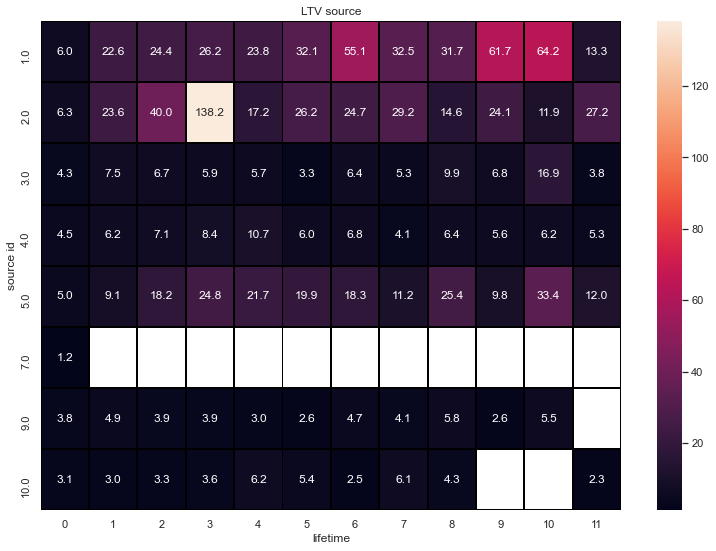

In [97]:
orders_cohort_source = orders_merge.groupby(['lifetime', 'source id']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
orders_cohort_source['ltv'] = orders_cohort_source['revenue'] / orders_cohort_source['uid']
cohort_size_source = orders_cohort_source.pivot_table(
    index='source id',
    columns='lifetime',
    values='ltv',
    aggfunc='mean')
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('LTV source')
sns.heatmap(
    cohort_size_source, 
    annot=True, fmt='.1f', 
    linewidths=1, 
    linecolor='black')

In [98]:
ltv_source = orders_cohort_source.pivot_table(
    index='source id',
    values='ltv',
    aggfunc='sum')
ltv_source.sort_values(by='ltv', ascending=False)

,ltv
source id,
1.0,393.599416
2.0,383.155978
5.0,208.850668
3.0,82.388255
4.0,77.292929
9.0,44.882598
10.0,39.638592
7.0,1.220000


### Вывод:
- больше всего было потрачено на 3 источник 42%, на 4 источник 18% и на 5 исчтоник 15%
- меньше всего потратили на рекламу в августе, а больше всего в декабре. Осень - весна периоды когда денег на рекламу вкладывали больше всего
- расходы не окупились, потеряли 23% денег потраченных на привлечение
- 1 источник стабильно приносящий доход, все остальные источники окупаются очень редко, 3 самый убыточный
- Средний чек первого источника показывает стабильную динамику
- Самый высокий средний чек был в декабре с утройств desktop
- пользователи touch стабильнее возвращаются на сайт, а вот пользователи desktop постпенно уходят. Возможно это связано с тем что touch всегда с собой
- в среднем каждый пользователь из 1 истоника показал наилучший доход(393) за все время работы с ним
- рекомендации: глядя на показатели ROI и LTV считаю что необходимо развитвать 1 источник рекламы, а для наилчшего эффекта развивать мобильное приложение так как retention desktop-а имеет отрицательную динамику.